Data Set 1:
This data set is from LA City's public data Geohub, accessed from the following link:
https://geohub.lacity.org/datasets/5455a5c504064c38b5ac9638d8580d92_0/explore?location=34.177286%2C-118.367953%2C10.05.

It shows a breakdown of median household income in various areas all over LA County, and includes tract, neighborhood or city breakdowns for each.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = "https://raw.githubusercontent.com/bonitaw04/project-files/refs/heads/main/Median_Income_and_AMI_(census_tract)_boyle_echo_ktown.csv"
df = pd.read_csv(filepath, dtype={"tract": str})
# because we are going by neighborhood name, we don't have to convert the tract codes to strings but i kept this code in anyway to reference back for future work

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# seemed like the easiest way to upload was to add it do google drive first, and it's up, nice

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.rename(columns={'csa': 'neighborhood'}, inplace=True)
df.head()

,tract,med_hh_income,number_of_households,neighborhood
0,6037400602,85369.0,1461,Los Angeles - Boyle Heights
1,6037400603,96845.0,1931,Los Angeles - Boyle Heights
2,6037400605,98850.0,2479,Los Angeles - Boyle Heights
3,6037400801,124401.0,1937,Los Angeles - Boyle Heights
4,6037401001,130764.0,959,Los Angeles - Boyle Heights


In [ ]:
df.columns

# checking that data imported properly
# amazing

Index(['tract', 'med_hh_income', 'number_of_households', 'neighborhood'], dtype='object')

In [ ]:
df["med_hh_income"].describe()

,med_hh_income
count,44.000000
mean,96416.704874
std,22124.885089
min,64732.000000
25%,80055.750000
50%,91697.500000
75%,104929.250000
max,158189.000000


In [ ]:
boyle_heights = [
    "6037400602",
    "6037400603",
    "6037400605",
    "6037400801",
    "6037401001",
    "6037401002",
    "6037401101",
    "6037401102",
    "6037401201",
    "6037401202",
    "6037401203",
    "6037401303",
    "6037401304",
    "6037401311",
    "6037401312",
    "6037401500",
    "6037401601",
    "6037401602",
    "6037401705",
    "6037401706",
    "6037401707",
    "6037401801",
    "6037401802"
]

In [ ]:
echo_park = [
    "6037407901",
    "6037407902",
    "6037408003"
]



In [ ]:
koreatown = [
    "6037480902",
    "6037480903",
    "6037481001",
    "6037481002",
    "6037481101",
    "6037481102",
    "6037481103",
    "6037481201",
    "6037481203",
    "6037481300",
    "6037481401",
    "6037481403",
    "6037481404",
    "6037481500",
    "6037481603"
]

In [ ]:
# assigning neighborhoods to tracts in this way actually wasn't necessary to do the graphs but don't want to mess with the code now just in case because colab has been glitching today

In [ ]:
import seaborn as sns
# turns out we need to import this one too

In [ ]:
df["med_hh_income"].describe()
# to check descriptive stats generally

,med_hh_income
count,44.000000
mean,96416.704874
std,22124.885089
min,64732.000000
25%,80055.750000
50%,91697.500000
75%,104929.250000
max,158189.000000


In [ ]:
df.groupby("neighborhood")["med_hh_income"].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
Los Angeles - Boyle Heights,23,106820,24542,71667,89993,98850,132220,158189
Los Angeles - Echo Park,3,97765,10675,85450,94461,103472,103923,104375
Los Angeles - Koreatown,15,80474,8007,64732,76239,79612,83805,98047


# **Visualization 1**

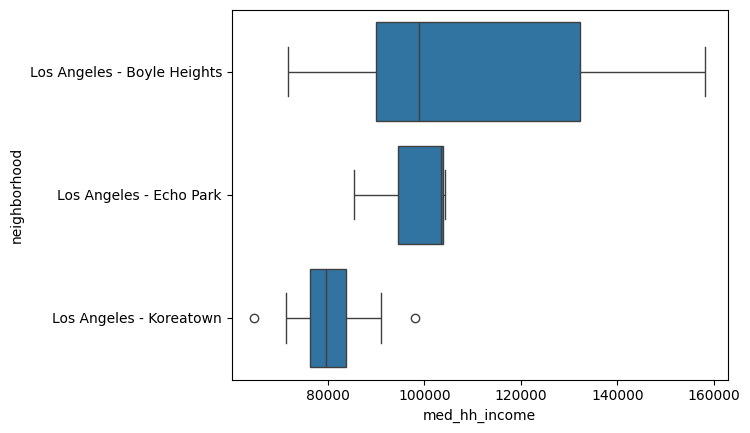

In [ ]:
ax = sns.boxplot(x=df['med_hh_income'], y=df['neighborhood'])
# making first draft of boxplot

In [ ]:
ax.set_title("Box Plot of Median Household Income by Neighborhood")
# adding a title

Text(0.5, 1.0, 'Box Plot of Median Household Income by Neighborhood')

In [ ]:
ax.set_xlabel("Neighborhood")
# making it nicer to read

Text(0.5, 24.140625, 'Neighborhood')

In [ ]:
ax.set_ylabel("Median Household Income")
# making it nicer to read

Text(24.000000000000043, 0.5, 'Median Household Income')

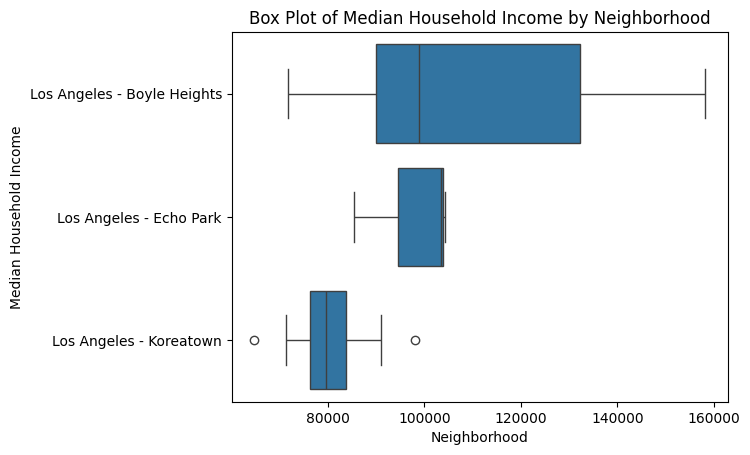

In [ ]:
ax.get_figure()

**Visualization 1: Box Plot**

The visualization chosen was used to gather a larger understanding of household income within those neighborhoods by creating a boxplot visual using median household income information within our 3 chosen neighborhoods. This enriches the descriptive statistics by making the ranges of data much clearer and easier to identify. The size of each box plot shows that Koreatown has a smaller income range than Boyle Heights, for example.



#**Visualization 2**

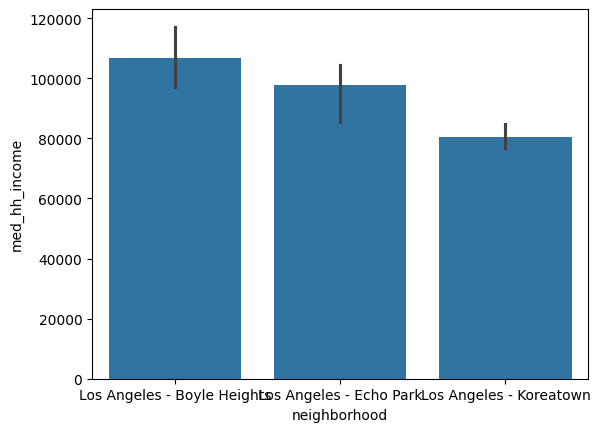

In [ ]:
ax = sns.barplot(x=df["neighborhood"], y=df['med_hh_income'])
# making a bar graph of income by neighborhood

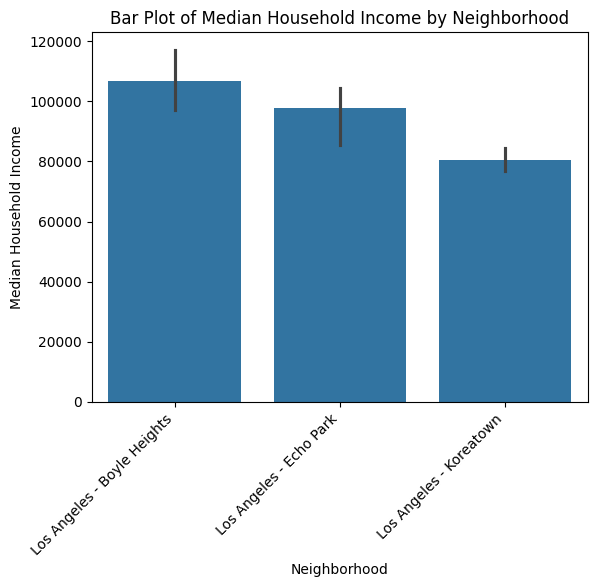

In [ ]:
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Median Household Income")
ax.set_title("Bar Plot of Median Household Income by Neighborhood")
# changing the labels to make them nicer to read
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# then rotating labels on x axis so they aren't overlapping
ax.get_figure()
# then drawing up the figure

**Visualization 2:** **Bar Graph**
</br>
This graph shows clearly how the neighborhoods' median household incomes compare; it is more obvious now that Boyle Heights has the highest median household income of the three neighborhoods. We can also see that the median household income for each neighborhood is also very close to the mean household income for each neighborhood, perhaps suggesting that the income distribution is relatively balanced.

# **Visualization 3 (bad)**

/tmp/ipython-input-3893511266.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.neighborhoods = df[df["neighborhood"].isin(neighborhoods)]


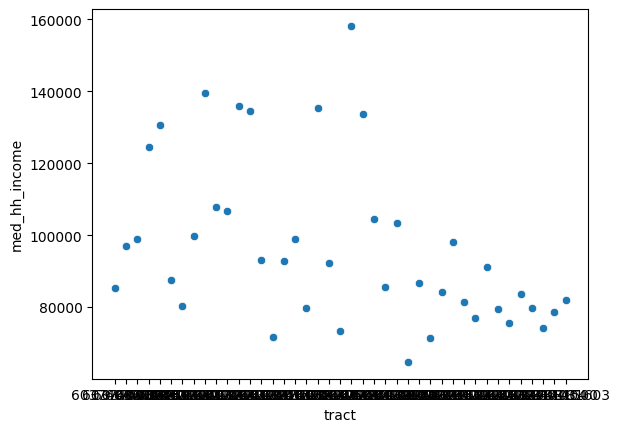

In [ ]:
neighborhoods = ['Los Angeles - Boyle Heights', 'Los Angeles - Echo Park', 'Los Angeles - Koreatown']
df.neighborhoods = df[df["neighborhood"].isin(neighborhoods)]
ax = sns.scatterplot(x=df["tract"], y=df["med_hh_income"])

**Bad Visualization:** <br>
This visualization has the potential to be interesting--we can see that many tracts have similar median household incomes, with some outliers. But how can we identify which neighborhood the outliers are from? Color coding would be necessary here. The labelling is also unreadable; we need to fix that.

# **Visualization 3 (improved)**



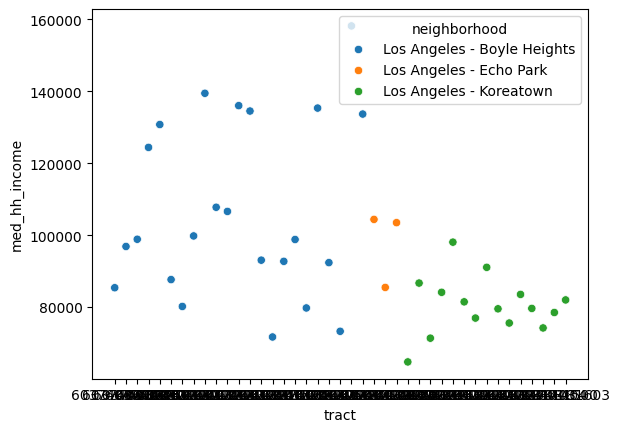

In [ ]:
neighborhoods = ['Los Angeles - Boyle Heights', 'Los Angeles - Echo Park', 'Los Angeles - Koreatown']
df.neighborhoods = df[df["neighborhood"].isin(neighborhoods)]
ax = sns.scatterplot(x=df["tract"], y=df["med_hh_income"], hue=df["neighborhood"])

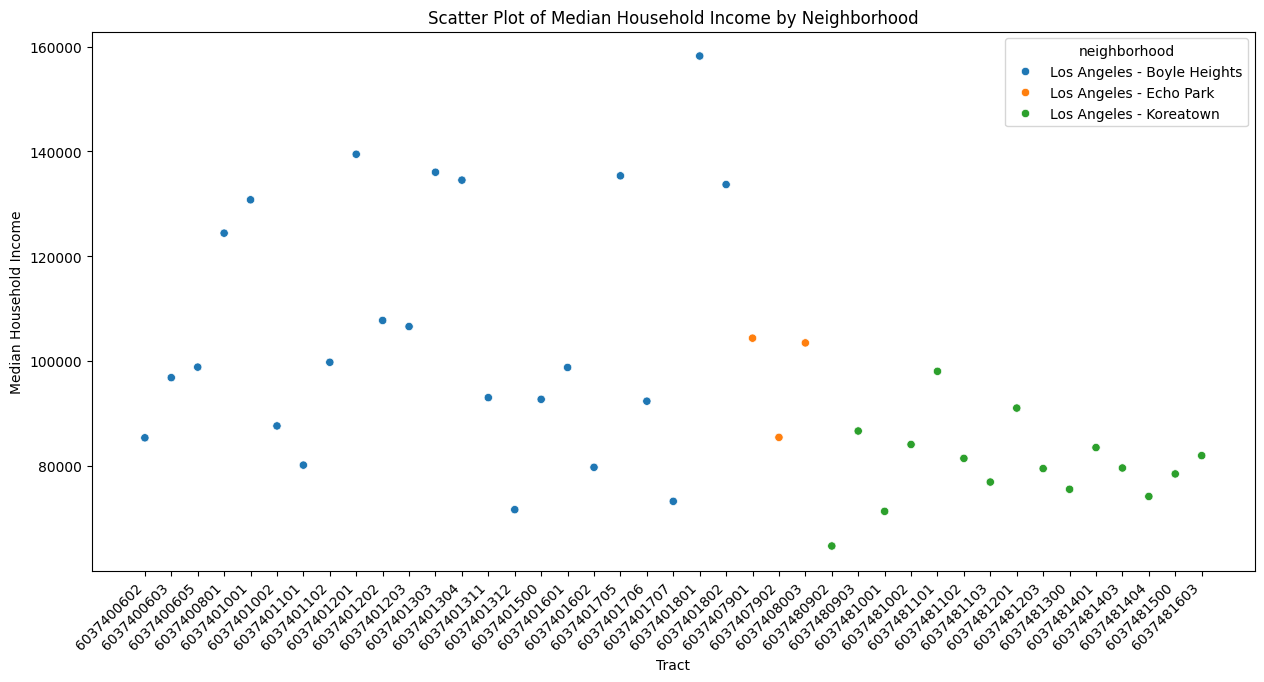

In [ ]:
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
fig = ax.get_figure()
fig.set_size_inches(15, 7)
ax.set_xlabel("Tract")
ax.set_ylabel("Median Household Income")
ax.set_title("Scatter Plot of Median Household Income by Neighborhood")
ax.get_figure()

**Visualization 4: Scatterplot**
</br>
This plot is interesting because it shows us some patterns in the data. Many of the tracts fall within the 80000 to 120000 range, but a handful of tracts in the Boyle Heights neighborhood lie far above that range, indicating that there could be inflation in the descriptive statistics for Boyle Heights. It is interesting to see how Koreatown and Echo Park's tracts are relatively even with each other.

---------
Sam G. cleaned the dataset and wrote the code for the boxplot and bar graph. Bonita W. wrote the code for the bad visualization and its improved version. Kimmy R. identified the variables and visualizations, and wrote the commentary for the graphs.